In [60]:


import numpy as np # linear algebra
import pandas as pd # data processing


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


        

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df = pd.read_csv('/Users/aumkarringe/Documents/ML Project/untitled folder 2/heart_disease.csv')
df

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,Male,50,uneducated,1,1.0,0.0,no,1,0,313.0,179.0,92.0,25.97,66.0,86.0,yes
4234,Male,51,graduate,1,43.0,0.0,no,0,0,207.0,126.5,80.0,19.71,65.0,68.0,No
4235,Female,48,primaryschool,1,20.0,NaN,no,0,0,248.0,131.0,72.0,22.00,84.0,86.0,No
4236,Female,44,uneducated,1,15.0,0.0,no,0,0,210.0,126.5,87.0,19.16,86.0,NaN,No


In [63]:
df['education'].value_counts()

education
uneducated       1720
primaryschool    1253
graduate          687
postgraduate      473
Name: count, dtype: int64

In [64]:
df.isnull().sum()

Gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
Heart_ stroke        0
dtype: int64

In [65]:
df = df.fillna({'cigsPerDay':5})

In [66]:
df = df.dropna(subset=['heartRate', 'totChol', 'education', 'BPMeds'])

In [67]:
df['BMI'] = df.BMI.fillna(value=df['BMI'].mean())

In [68]:
df['glucose'] = df.glucose.fillna(value=df['glucose'].mean())

In [69]:
df.isnull().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
Heart_ stroke      0
dtype: int64

In [70]:
df.shape

(4031, 16)

In [71]:
df['Heart_ stroke'].unique()

array(['No', 'yes'], dtype=object)

In [72]:
df

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232,Male,68,uneducated,0,0.0,0.0,no,1,0,176.0,168.0,97.0,23.14,60.0,79.000000,yes
4233,Male,50,uneducated,1,1.0,0.0,no,1,0,313.0,179.0,92.0,25.97,66.0,86.000000,yes
4234,Male,51,graduate,1,43.0,0.0,no,0,0,207.0,126.5,80.0,19.71,65.0,68.000000,No
4236,Female,44,uneducated,1,15.0,0.0,no,0,0,210.0,126.5,87.0,19.16,86.0,81.909263,No


In [73]:
import warnings
warnings.filterwarnings("ignore")

<Axes: >

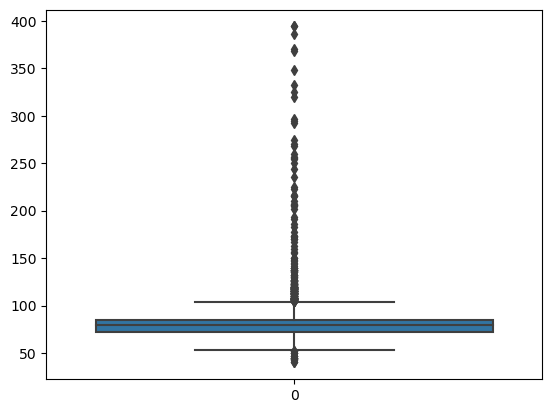

In [74]:
sns.boxplot(df['glucose'])

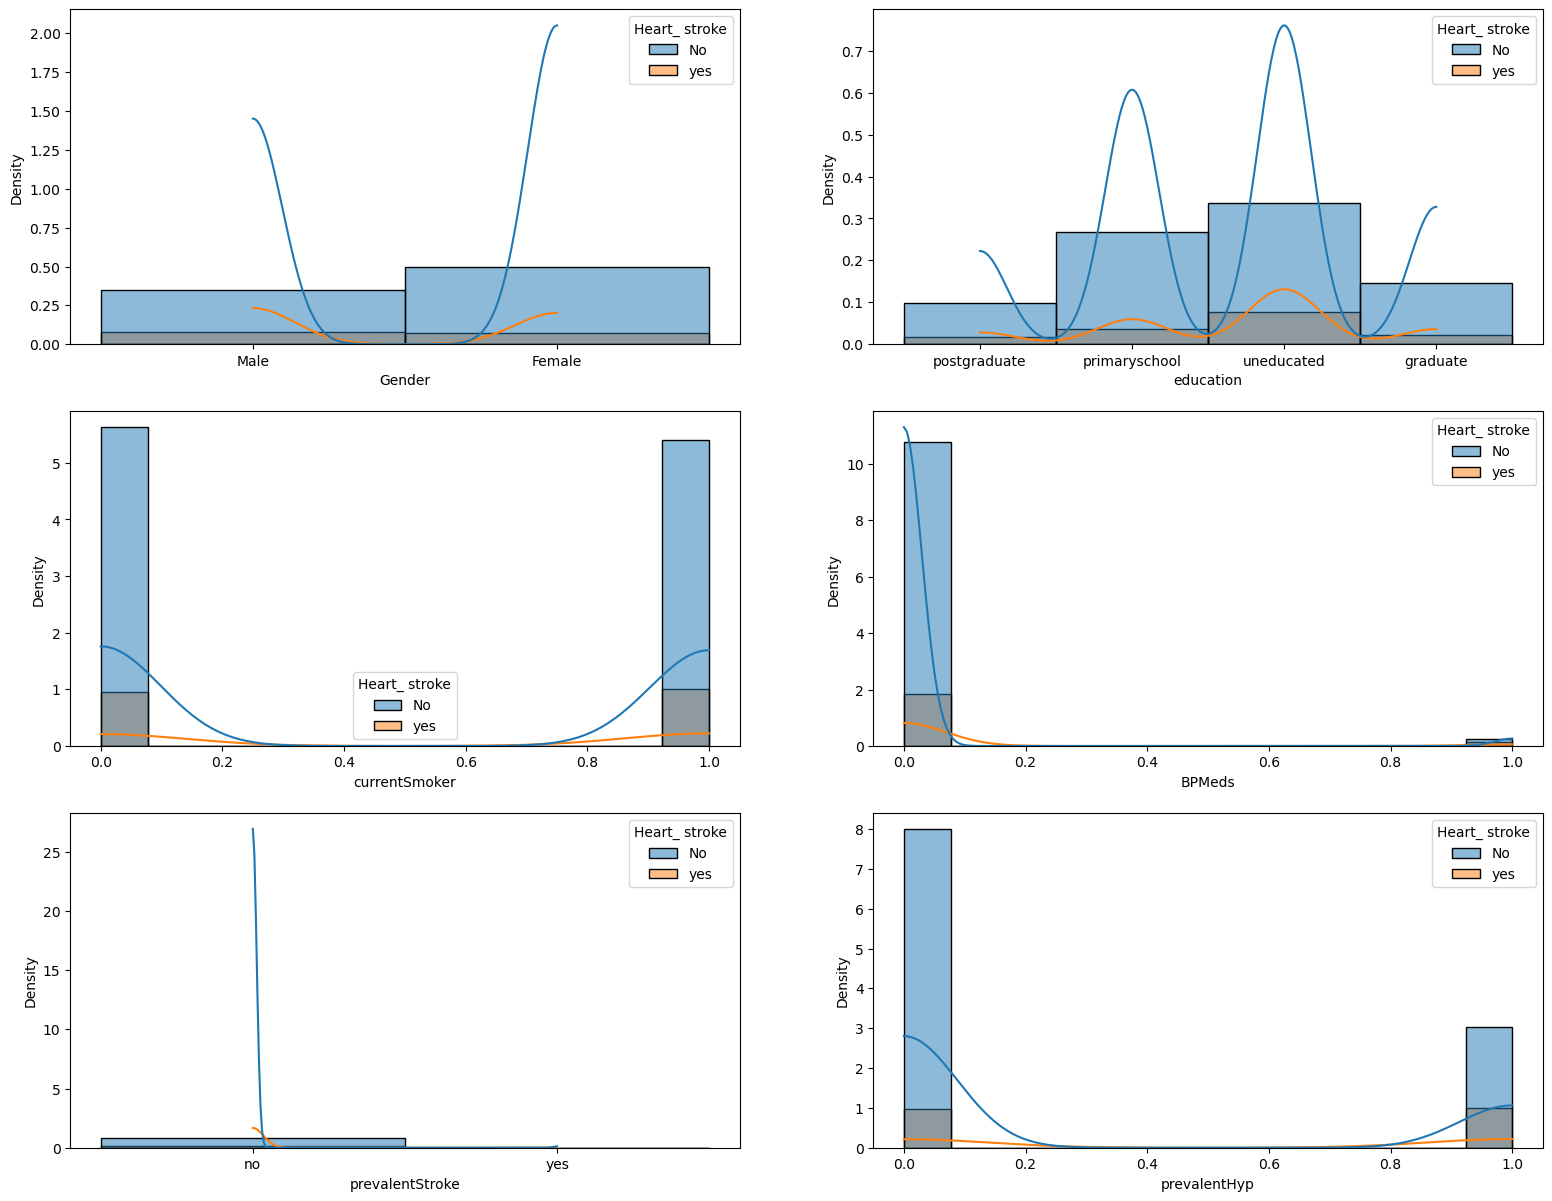

In [75]:
hist = ['Gender','education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp']
plt.figure(figsize=(19,20))
for i in range(0,len(hist)):
    plt.subplot(4,2,i+1)
    sns.histplot(data=df, x=hist[i], hue='Heart_ stroke',kde=True, stat="density")
    if i == 5:
        plt.show()

<Axes: xlabel='cigsPerDay', ylabel='age'>

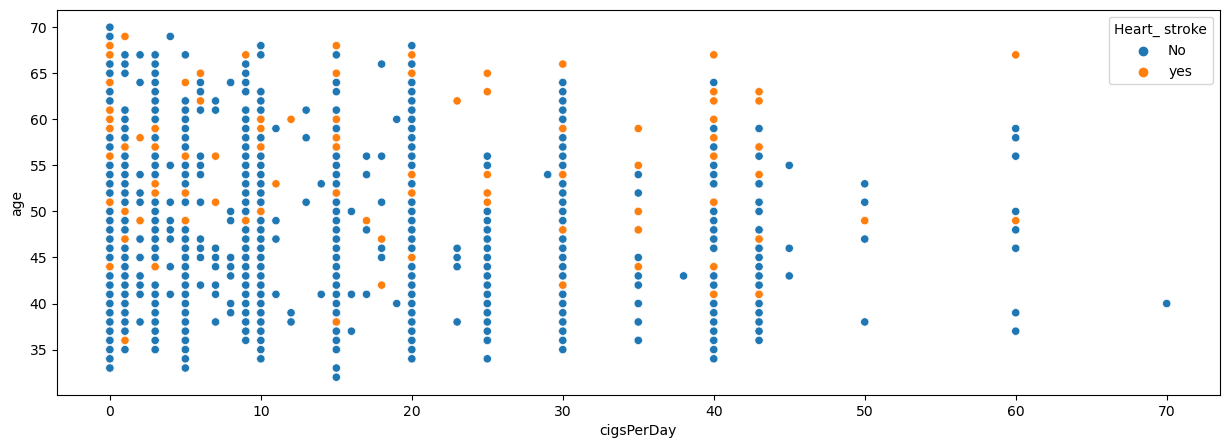

In [76]:
# Scatter plot of cigarettes per day verses age

plt.figure(figsize=(15,5))
sns.scatterplot(data=df, x='cigsPerDay', y='age', hue='Heart_ stroke')

In [77]:
# KDE plot

def kde_plot(index):
    facet = sns.FacetGrid(df, hue='Heart_ stroke',aspect=4)
    facet.map(sns.kdeplot,index,fill= True)
    facet.set(xlim=(0, df[index].max()))
    facet.add_legend()
    plt.show()

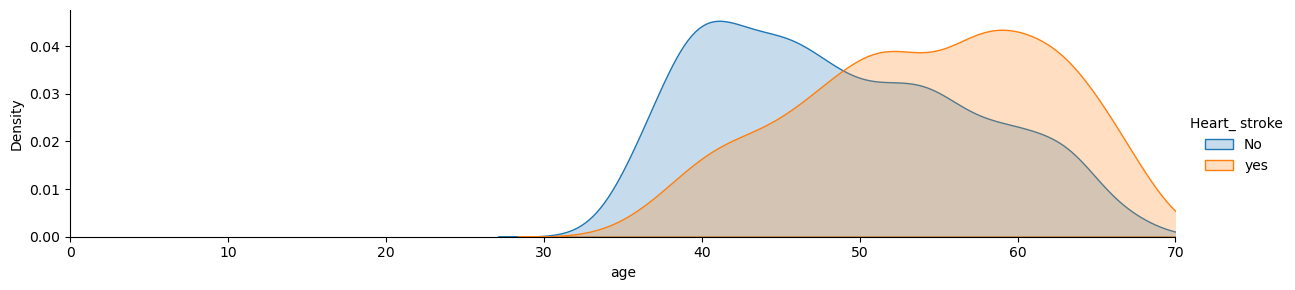

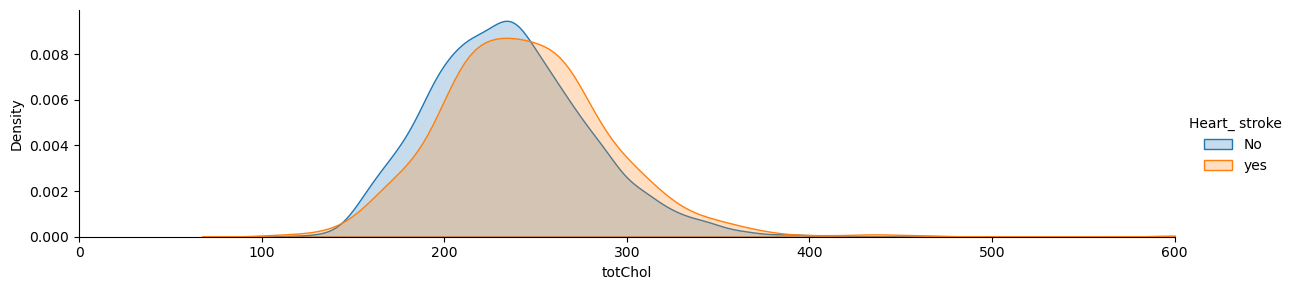

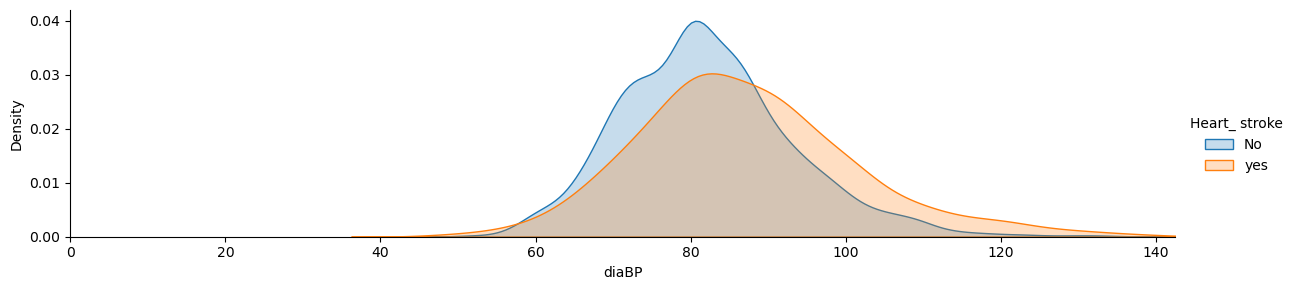

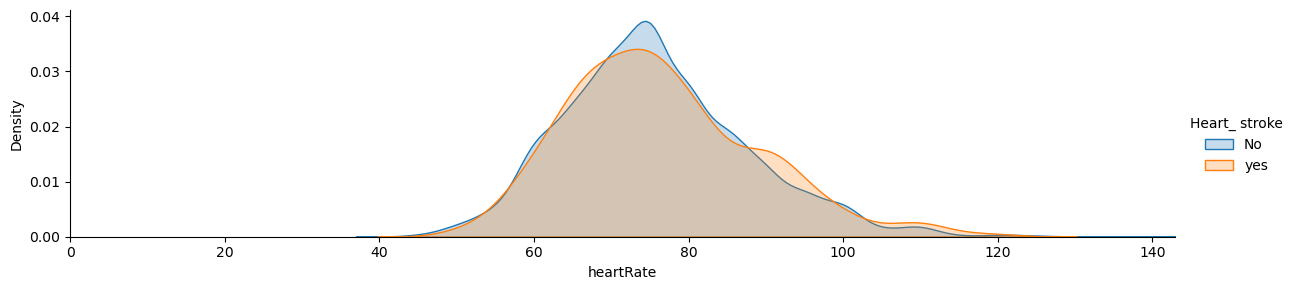

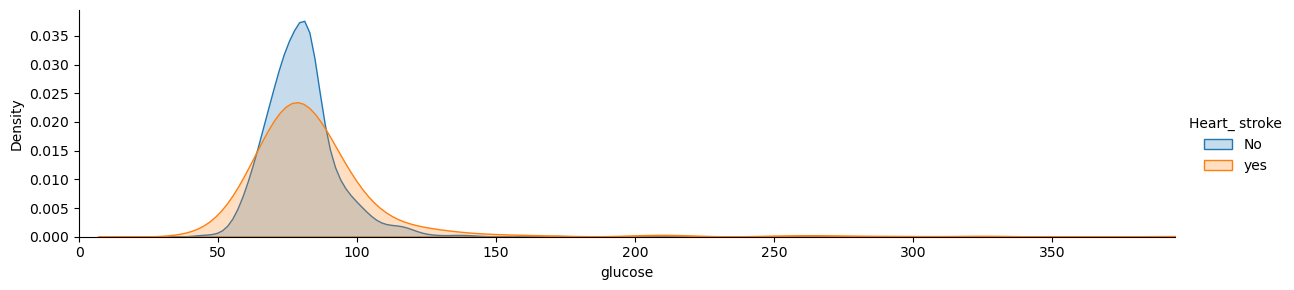

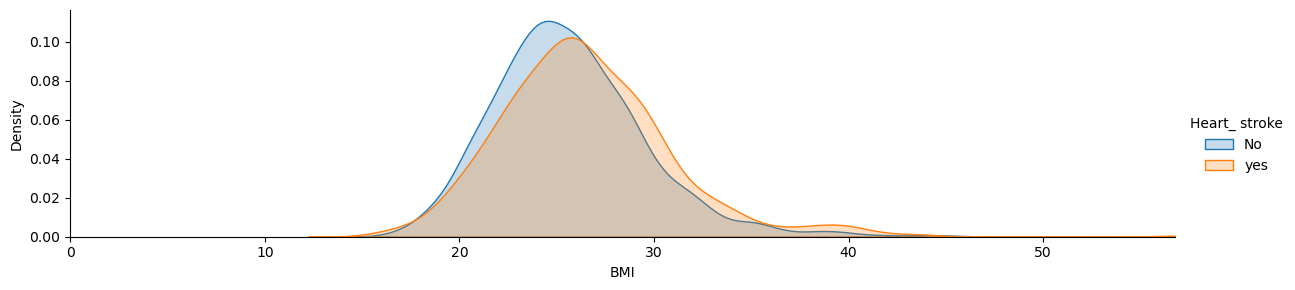

In [78]:
kde_plot('age')
kde_plot('totChol')
kde_plot('diaBP')
kde_plot('heartRate')
kde_plot('glucose')
kde_plot('BMI')

<Axes: title={'center': 'Stroke Distribution'}, xlabel='Heart_ stroke'>

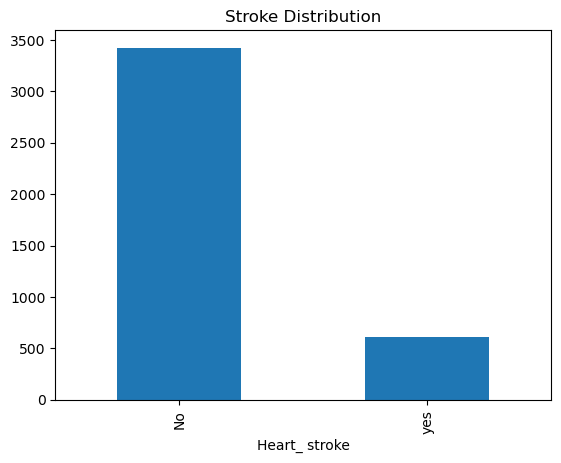

In [79]:
df['Heart_ stroke'].value_counts().plot(kind='bar', title='Stroke Distribution')

Text(0, 0.5, 'Count')

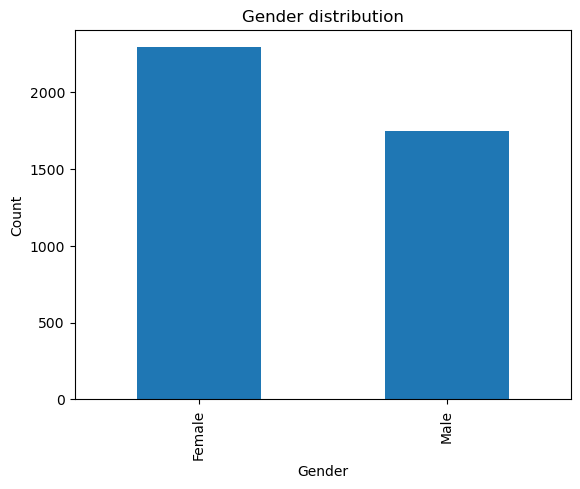

In [80]:
ax = df['Gender'].value_counts().plot(kind='bar',title='Gender distribution')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')

In [81]:
numeric_columns = df.select_dtypes(exclude='object')

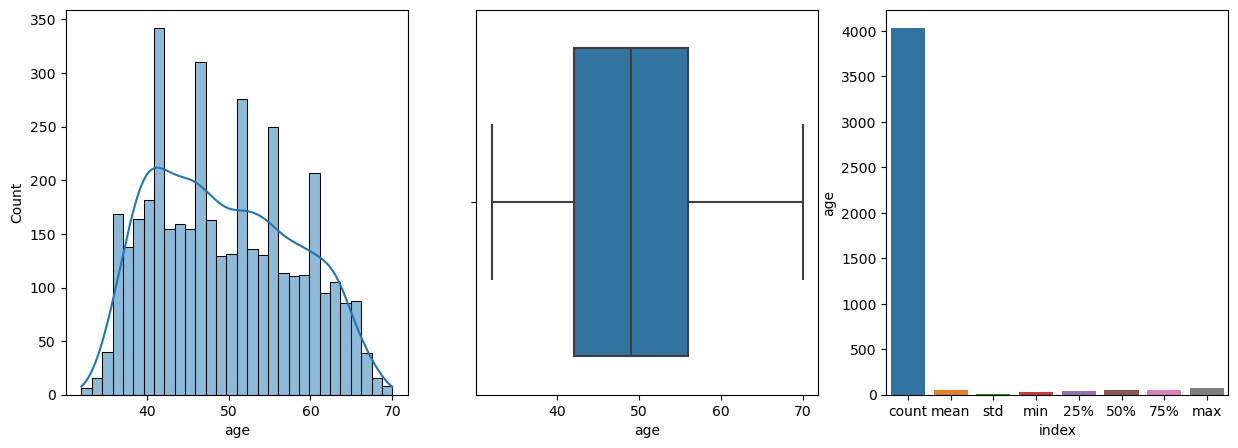

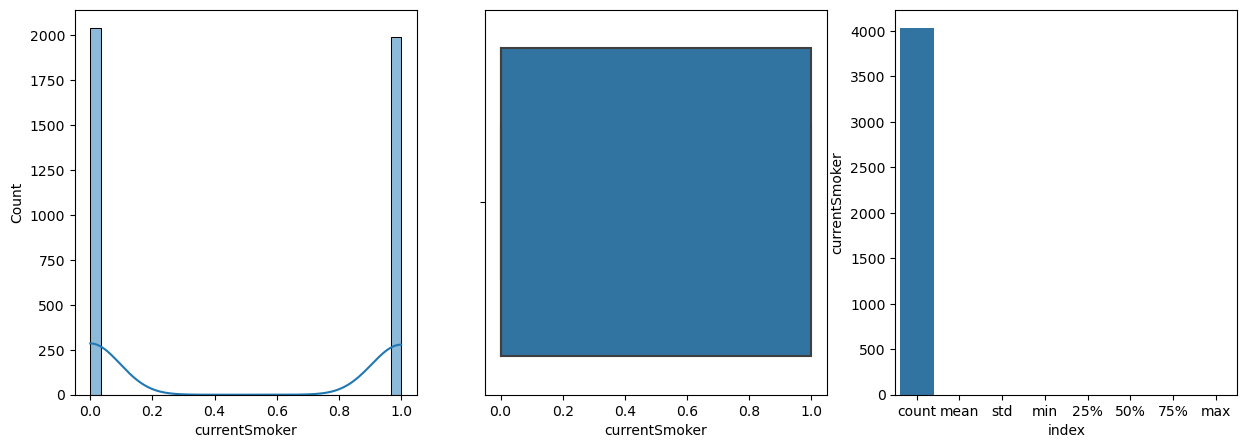

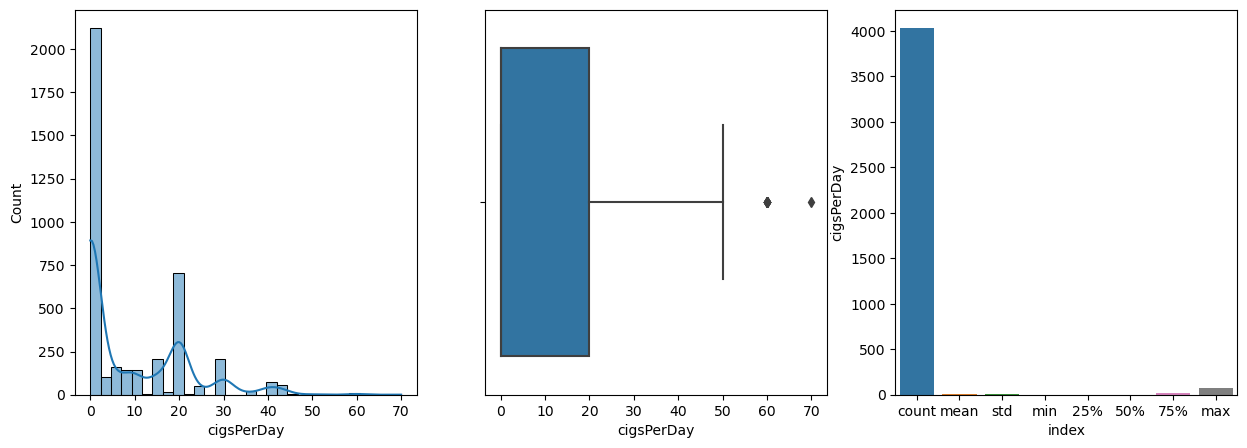

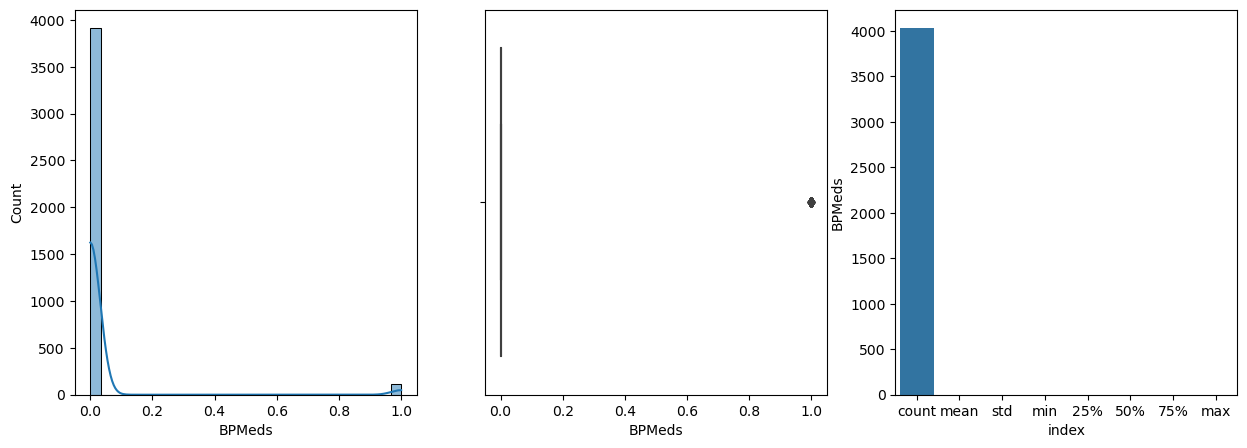

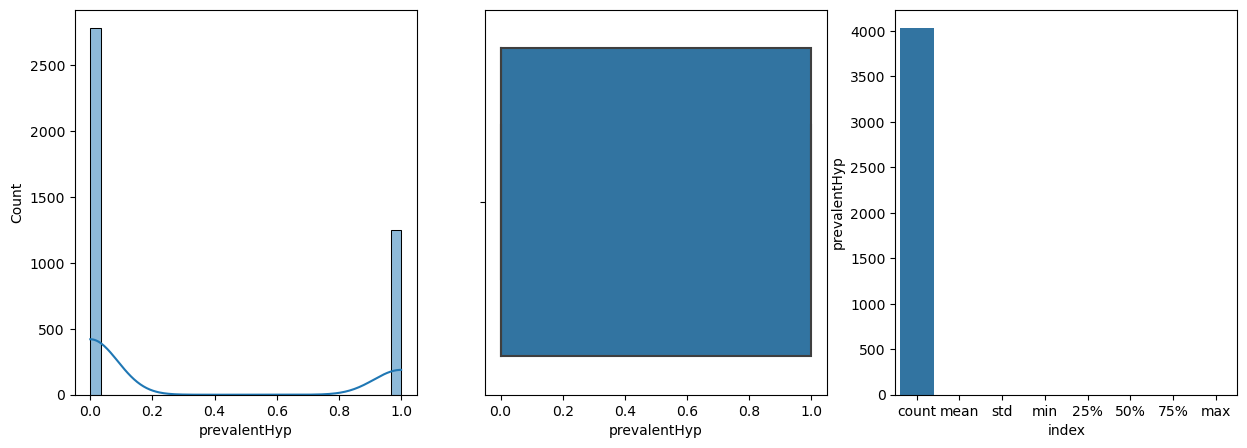

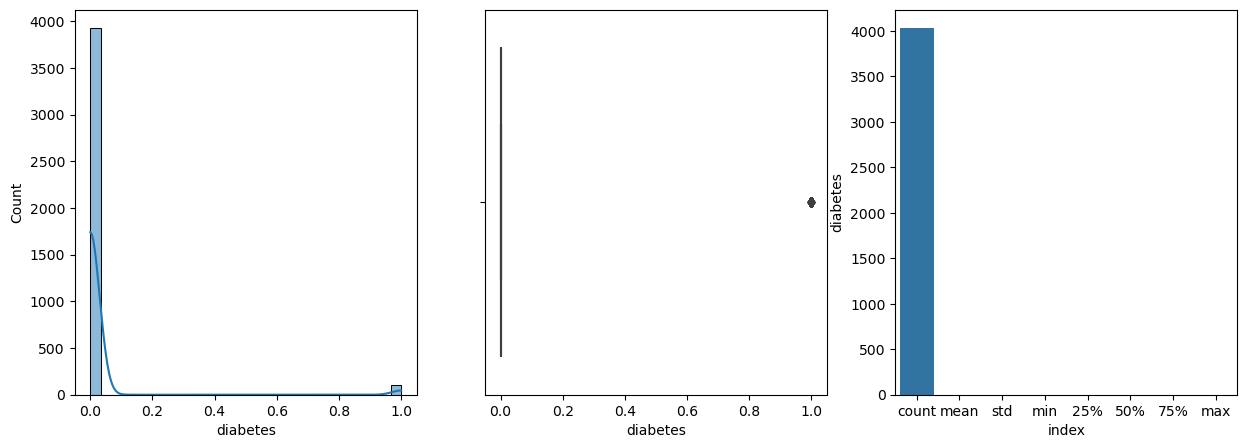

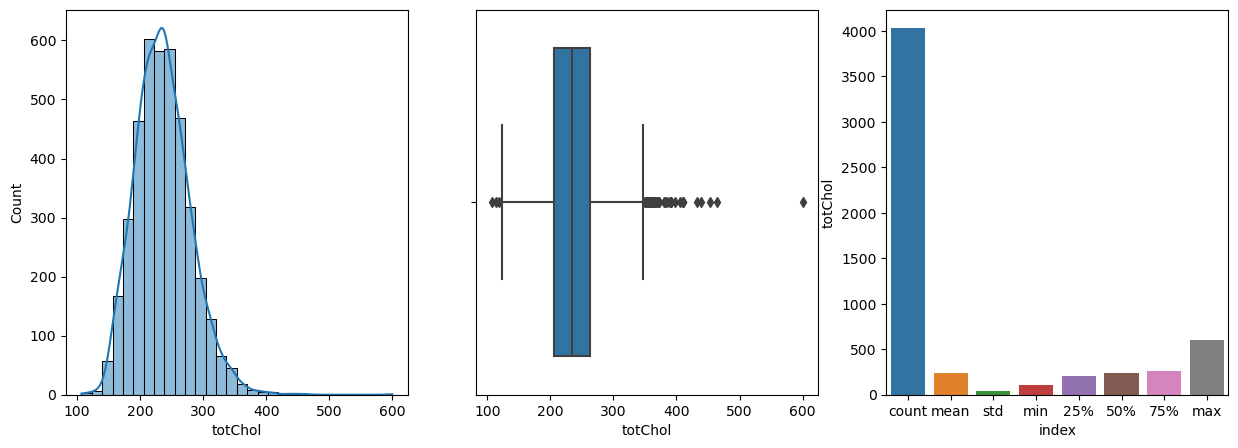

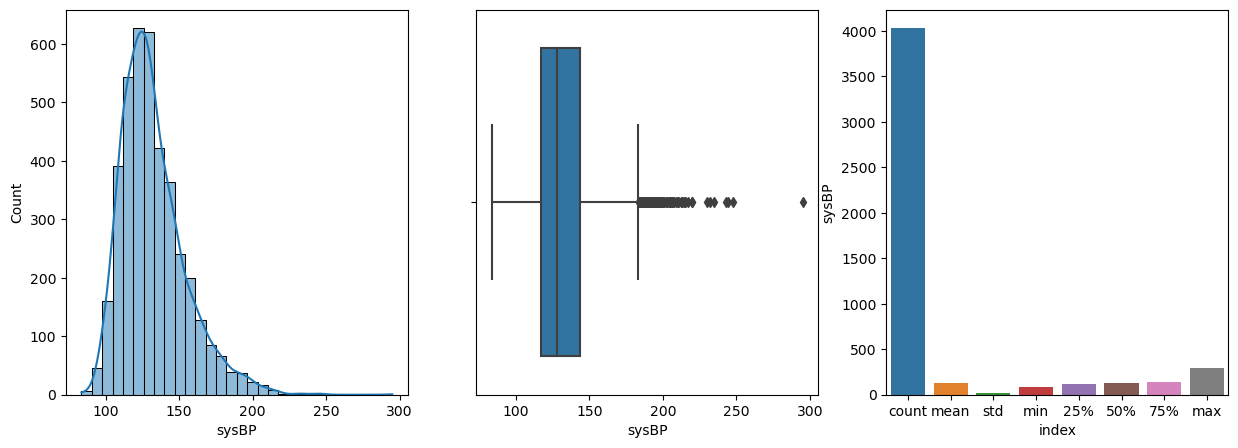

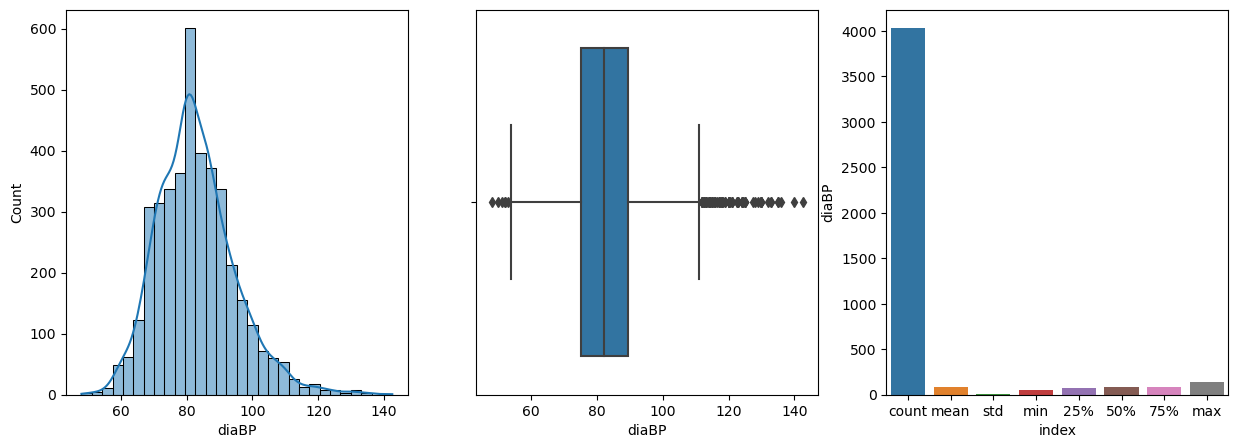

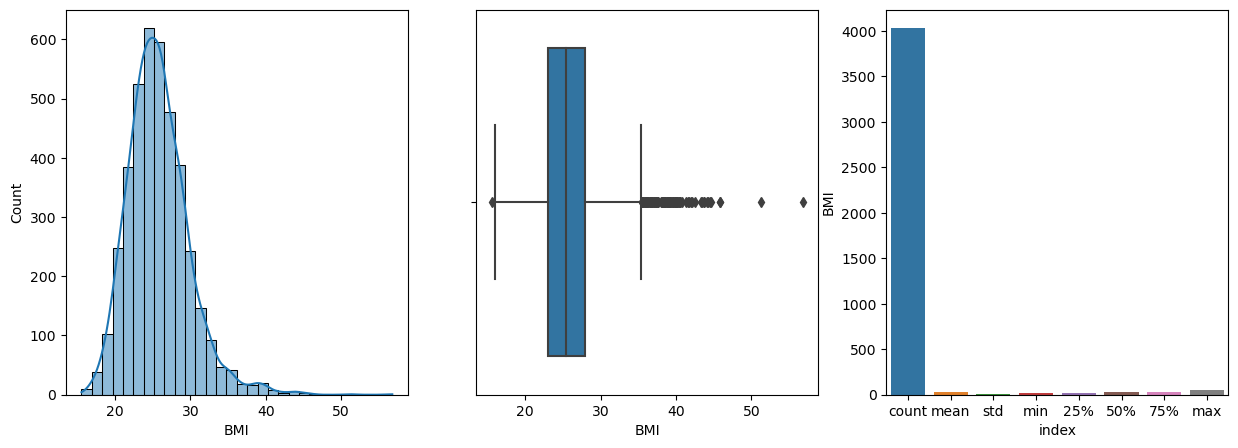

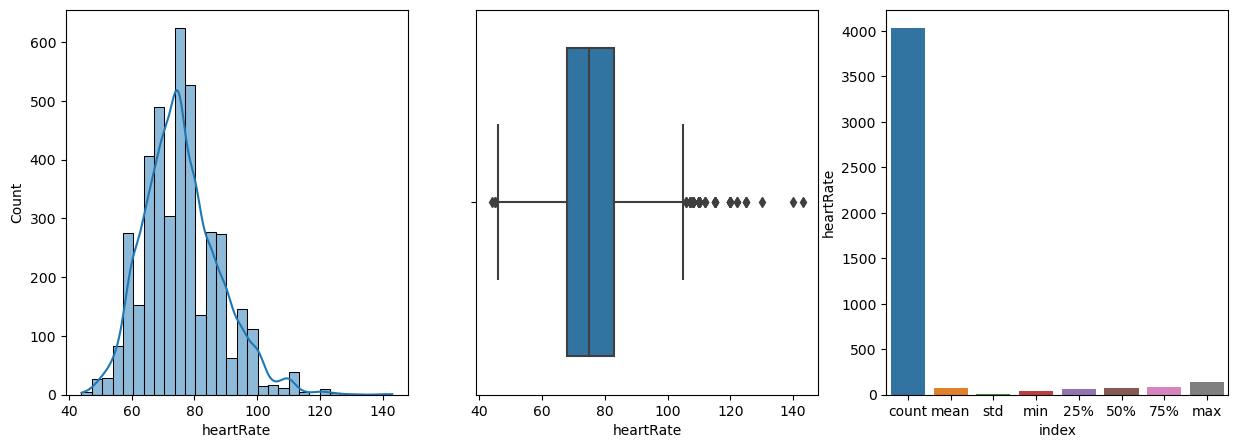

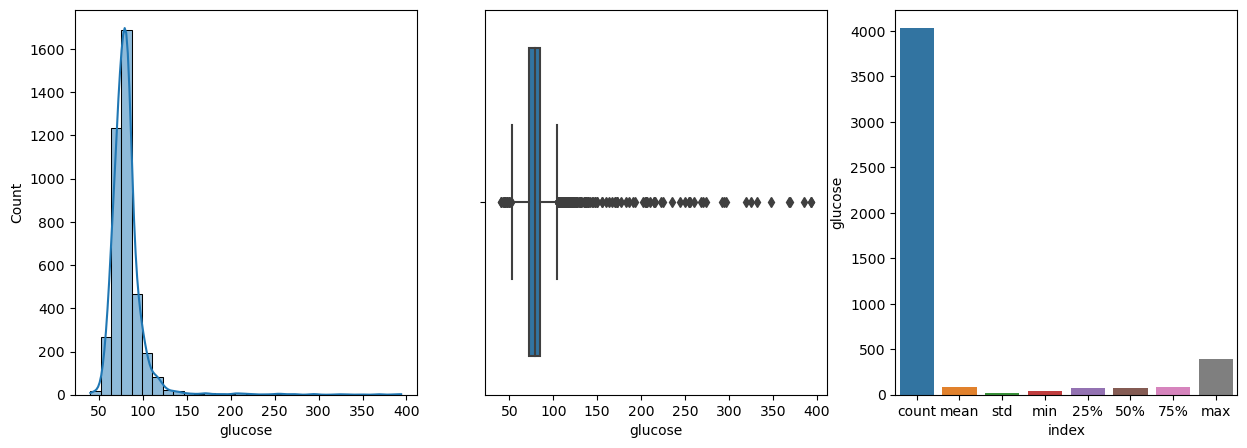

In [82]:
for col in numeric_columns:
    fig, axs = plt.subplots(1,3,figsize=(15,5))
    sns.histplot(data=numeric_columns, x=col, bins=30,kde=True, ax = axs[0])
    sns.boxplot(x=numeric_columns[col], ax=axs[1])
    sns.barplot(data= numeric_columns[col].describe().reset_index(), x='index', y=col, ax=axs[2])

<Axes: >

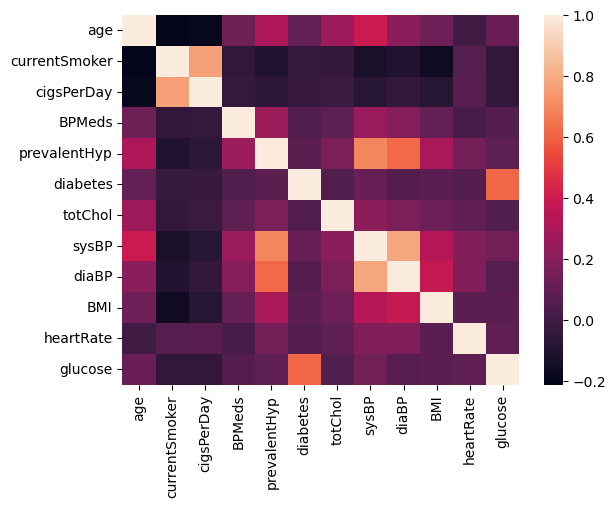

In [83]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
corr = numeric_df.corr()  # Calculate correlation matrix
sns.heatmap(corr)  # Plot heatmap


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4031 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4031 non-null   object 
 1   age              4031 non-null   int64  
 2   education        4031 non-null   object 
 3   currentSmoker    4031 non-null   int64  
 4   cigsPerDay       4031 non-null   float64
 5   BPMeds           4031 non-null   float64
 6   prevalentStroke  4031 non-null   object 
 7   prevalentHyp     4031 non-null   int64  
 8   diabetes         4031 non-null   int64  
 9   totChol          4031 non-null   float64
 10  sysBP            4031 non-null   float64
 11  diaBP            4031 non-null   float64
 12  BMI              4031 non-null   float64
 13  heartRate        4031 non-null   float64
 14  glucose          4031 non-null   float64
 15  Heart_ stroke    4031 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 664.4+ KB


In [85]:
df['education'].value_counts()

education
uneducated       1670
primaryschool    1226
graduate          671
postgraduate      464
Name: count, dtype: int64

In [86]:
from sklearn import preprocessing
l_enc = preprocessing.LabelEncoder()

In [87]:
df['education']= l_enc.fit_transform(df['education'])

In [88]:
df['education'].value_counts()

education
3    1670
2    1226
0     671
1     464
Name: count, dtype: int64

In [89]:
df['Heart_ stroke'] = l_enc.fit_transform(df['Heart_ stroke'])

In [90]:
df['Gender']= l_enc.fit_transform(df['Gender'])

In [91]:
df['Gender'].value_counts()

Gender
0    2287
1    1744
Name: count, dtype: int64

In [92]:
df['prevalentStroke']= l_enc.fit_transform(df['prevalentStroke'])

In [93]:
df['prevalentStroke'].value_counts()

prevalentStroke
0    4007
1      24
Name: count, dtype: int64

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4031 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4031 non-null   int64  
 1   age              4031 non-null   int64  
 2   education        4031 non-null   int64  
 3   currentSmoker    4031 non-null   int64  
 4   cigsPerDay       4031 non-null   float64
 5   BPMeds           4031 non-null   float64
 6   prevalentStroke  4031 non-null   int64  
 7   prevalentHyp     4031 non-null   int64  
 8   diabetes         4031 non-null   int64  
 9   totChol          4031 non-null   float64
 10  sysBP            4031 non-null   float64
 11  diaBP            4031 non-null   float64
 12  BMI              4031 non-null   float64
 13  heartRate        4031 non-null   float64
 14  glucose          4031 non-null   float64
 15  Heart_ stroke    4031 non-null   int64  
dtypes: float64(8), int64(8)
memory usage: 664.4 KB


In [95]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [96]:
X = df.drop(['Heart_ stroke'],axis=1)  #input
y = df['Heart_ stroke']  #output

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [98]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [99]:
accuracy = clf.score(X_test,y_test)

In [100]:
y_pred = clf.predict(X_test)

In [101]:
print(accuracy)

0.828996282527881


In [102]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn= KNeighborsClassifier()

In [103]:
clf_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [104]:
y_knn_pred = clf_knn.predict(X_test)

In [105]:
y_knn_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [106]:
knn_accuracy = clf_knn.score(X_test,y_test)

In [107]:
knn_accuracy

0.8302354399008675

In [108]:
from xgboost import XGBClassifier

In [109]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [110]:
from xgboost import XGBClassifier

In [111]:
XGBResampled = XGBClassifier()
XGBResampled.fit(X_train, y_train)
preds = XGBResampled.predict(X_test)
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100

print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))

XGBoost's prediction accuracy is: 82.40


              precision    recall  f1-score   support

           0       0.85      0.96      0.90       670
           1       0.44      0.14      0.21       137

    accuracy                           0.82       807
   macro avg       0.64      0.55      0.56       807
weighted avg       0.78      0.82      0.78       807



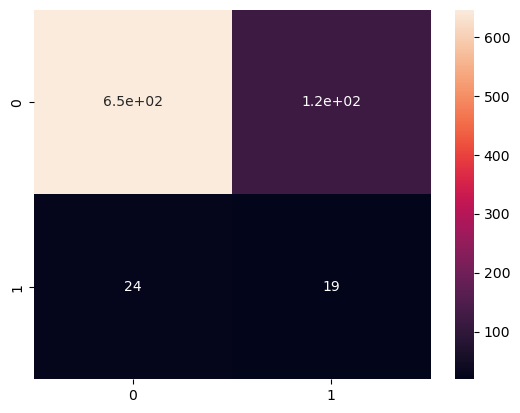

In [112]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(preds, y_test)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, preds))

In [113]:
# Attempting XGBoost with oversampling

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X,y)
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(0, 3424), (1, 3424)]


In [114]:
pip install --upgrade scikit-learn imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [115]:
pip install scikit-learn==<desired_version>


zsh:1: parse error near `>'
Note: you may need to restart the kernel to use updated packages.


In [116]:
# Attempting XGBoost with oversampling

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X,y)
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(0, 3424), (1, 3424)]


In [117]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size = 0.2, random_state=42)

XGBResampled = XGBClassifier()
XGBResampled.fit(X_train, y_train)
preds = XGBResampled.predict(X_test)
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100

print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))


XGBoost's prediction accuracy is: 92.55


              precision    recall  f1-score   support

           0       0.98      0.87      0.92       701
           1       0.88      0.98      0.93       669

    accuracy                           0.93      1370
   macro avg       0.93      0.93      0.93      1370
weighted avg       0.93      0.93      0.93      1370



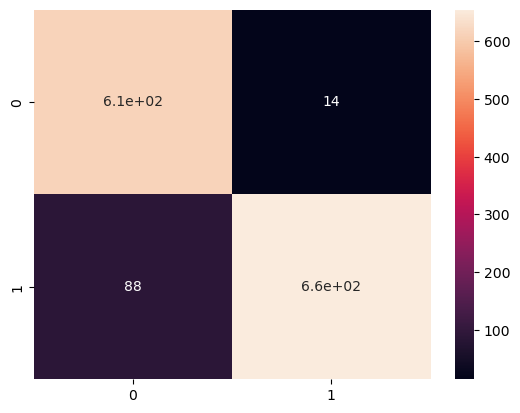

In [118]:

cm = confusion_matrix(preds, y_test)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, preds))